In [1]:
#Data as a science

#In this excercise we will work with the file: masacres_2022.xlsx. As it is known there is a security problem in Colombia
# and the country has been in war for more than 60 years. There are different violent groups and many of them takes over
# some territories attacking the local polulation, specially those who want to protect their rights and usage of the land,
# for the reasons mentioned before and others, civil population is been killed in masacres.

# In this study we want to show the different masacres in Colombia along the states (known in the country as departents)
# for the year of 2022.

import pandas as pd

# We import our data as a 'dataframe' using this simple instruction.
data=pd.read_excel(r"C:\Users\Usuario\Downloads\masacres_2022.xlsx")
# Lets see what that looks like (I limit the number of rows printed by using '[:10]', 
# and Python is '0' indexed, meaning the first item starts at '0'):

data.head(10)

,fecha,No. de victimas,Departamento,Municipio,cantidad
0,03/01/2022,3,VALLE DEL CAUCA,JAMUNDÍ,1
1,06/01/2022,3,CASANARE,MANÍ,1
2,08/01/2022,3,MAGDALENA,ZONA BANANERA,1
3,08/01/2022,3,NARIÑO,COLÓN GÉNOVA,1
4,14/01/2022,4,CAUCA,MIRANDA,1
5,17/01/2022,4,ANTIOQUIA,SANTO DOMINGO,1
6,17/01/2022,3,PUTUMAYO,PUERTO GUMÁN,1
7,17/01/2022,3,CHOCÓ,MEDIO SAN JUAN,1
8,20/01/2022,4,NORTE DE SANTANDER,OCAÑA,1
9,25/01/2022,3,NORTE DE SANTANDER,CÚCUTA,1


In [2]:
#Let´s check the format of the data presented
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   fecha            90 non-null     object
 1   No. de victimas  90 non-null     int64 
 2   Departamento     90 non-null     object
 3   Municipio        90 non-null     object
 4   cantidad         90 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 3.6+ KB


In [3]:
# Now we research the number of "departments" (known as states in other countries)of Colombia and their names
states=data.Departamento.unique()
states1=[x.lower() for x in states]
print(F"Number of States: {len(states1)}")
print(states1)

Number of States: 23
['valle del cauca', 'casanare', 'magdalena', 'nariño', 'cauca', 'antioquia', 'putumayo', 'chocó', 'norte de santander', 'la guajira', 'bogotá, d.c', 'bolívar', 'arauca', 'cundinamarca', 'amazonas', 'atlántico', 'tolima', 'caquetá', 'cesar', 'sucre', 'santander', 'meta', 'risaralda']


In [4]:
#Let´s research the date of the masacres in Colombia in 2022
date_list=data["fecha"].unique()
# Otra forma de acceder a una columna con su nombre
print(F"Starting on {min(date_list)}, ending on {max(date_list)}; with {len(date_list)} periods.")


Starting on 01/03/2022, ending on 31/10/2022; with 72 periods.


In [5]:
#From the data researched above, we know there were 72 masacres in Colombia in 2022, the first on 01/03/2022
# and the last on 31/10/2022. This information demonstrates that there is a serious security problem and the
#civilian population is in danger due to the massacres are very repetitive. 
# Now we want to know the number of victims for each massacre and its location to see the most affected 
#areas by this problem

In [6]:
# converting  fecha to date type
data["fecha"] = pd.to_datetime(data["fecha"])
# And let's check the overview again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   fecha            90 non-null     datetime64[ns]
 1   No. de victimas  90 non-null     int64         
 2   Departamento     90 non-null     object        
 3   Municipio        90 non-null     object        
 4   cantidad         90 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.6+ KB


C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/01/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17/01/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '20/01/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '25/01/2022' in DD/MM/YYYY format. Provide format o

In [7]:
#Now we select the set of data of interest for this study
data_slice = data[["fecha", "No. de victimas", "Departamento"]
                 ].sort_values("No. de victimas", ascending=False)
# Now we create our two slices, and set the index to Governorate
ds_start = data_slice.loc[data_slice.fecha == "01/03/2022"].set_index("Departamento")
ds_end = data_slice.loc[data_slice.fecha == "31/10/2022"].set_index("Departamento")
# And print
print(ds_start)
print(ds_end)

                  fecha  No. de victimas
Departamento                            
LA GUAJIRA   2022-01-03                3
                     fecha  No. de victimas
Departamento                               
VALLE DEL CAUCA 2022-10-31                4


C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\arraylike.py:40: UserWarning: Parsing '31/10/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.eq)


<AxesSubplot:xlabel='fecha'>

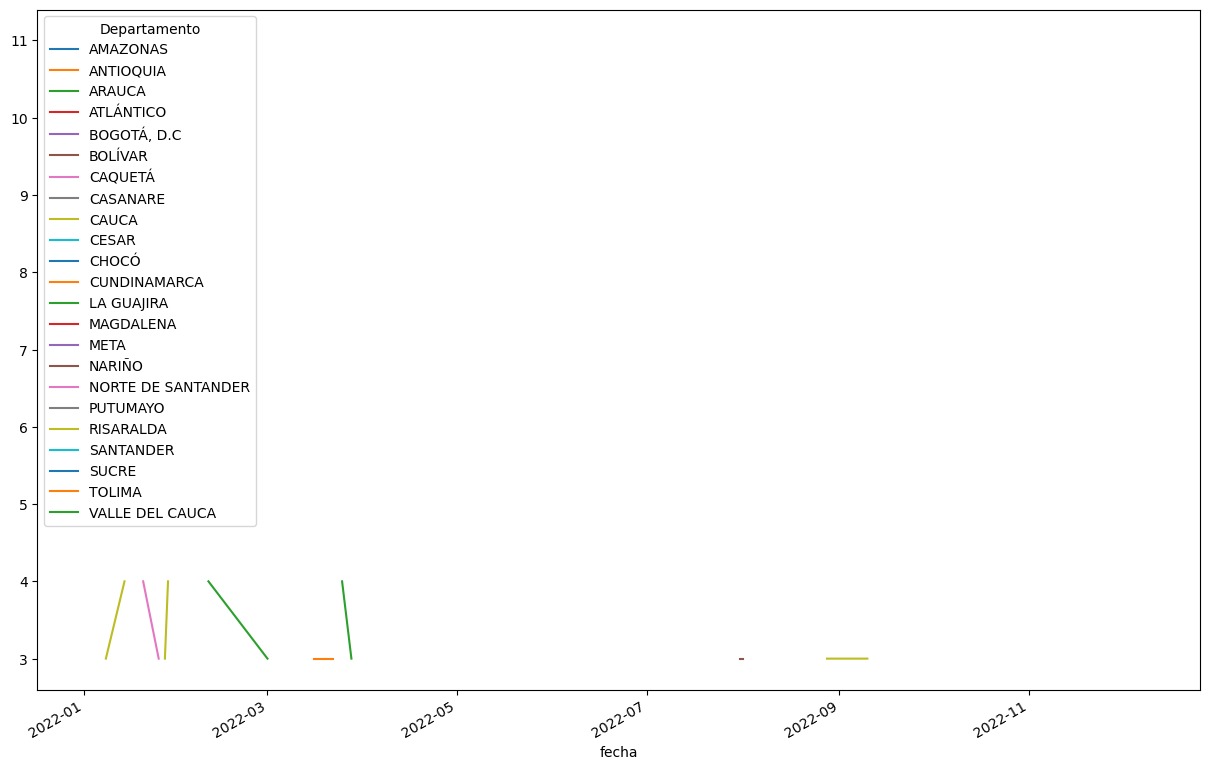

In [8]:
# Now let´s try to show the information of number of victims of massacres for evey state in Colombia along the 2022
# all in one figure

# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

# First we create a pivot table of the data we wish to plot. Here only the "No. de victimas".

drawing = pd.pivot_table(data_slice, values="No. de victimas", index=["fecha"], columns=["Departamento"])
# Then we set a plot figure size and draw
drawing.plot(figsize=(15,10), grid=False)

In [9]:
#As we see this is not the best picture to see the progression of masacres in colombia in 2022,
#  therefore we will show the information for each state using bar charts in order to see the different
# massacres by month with its respective number of victims

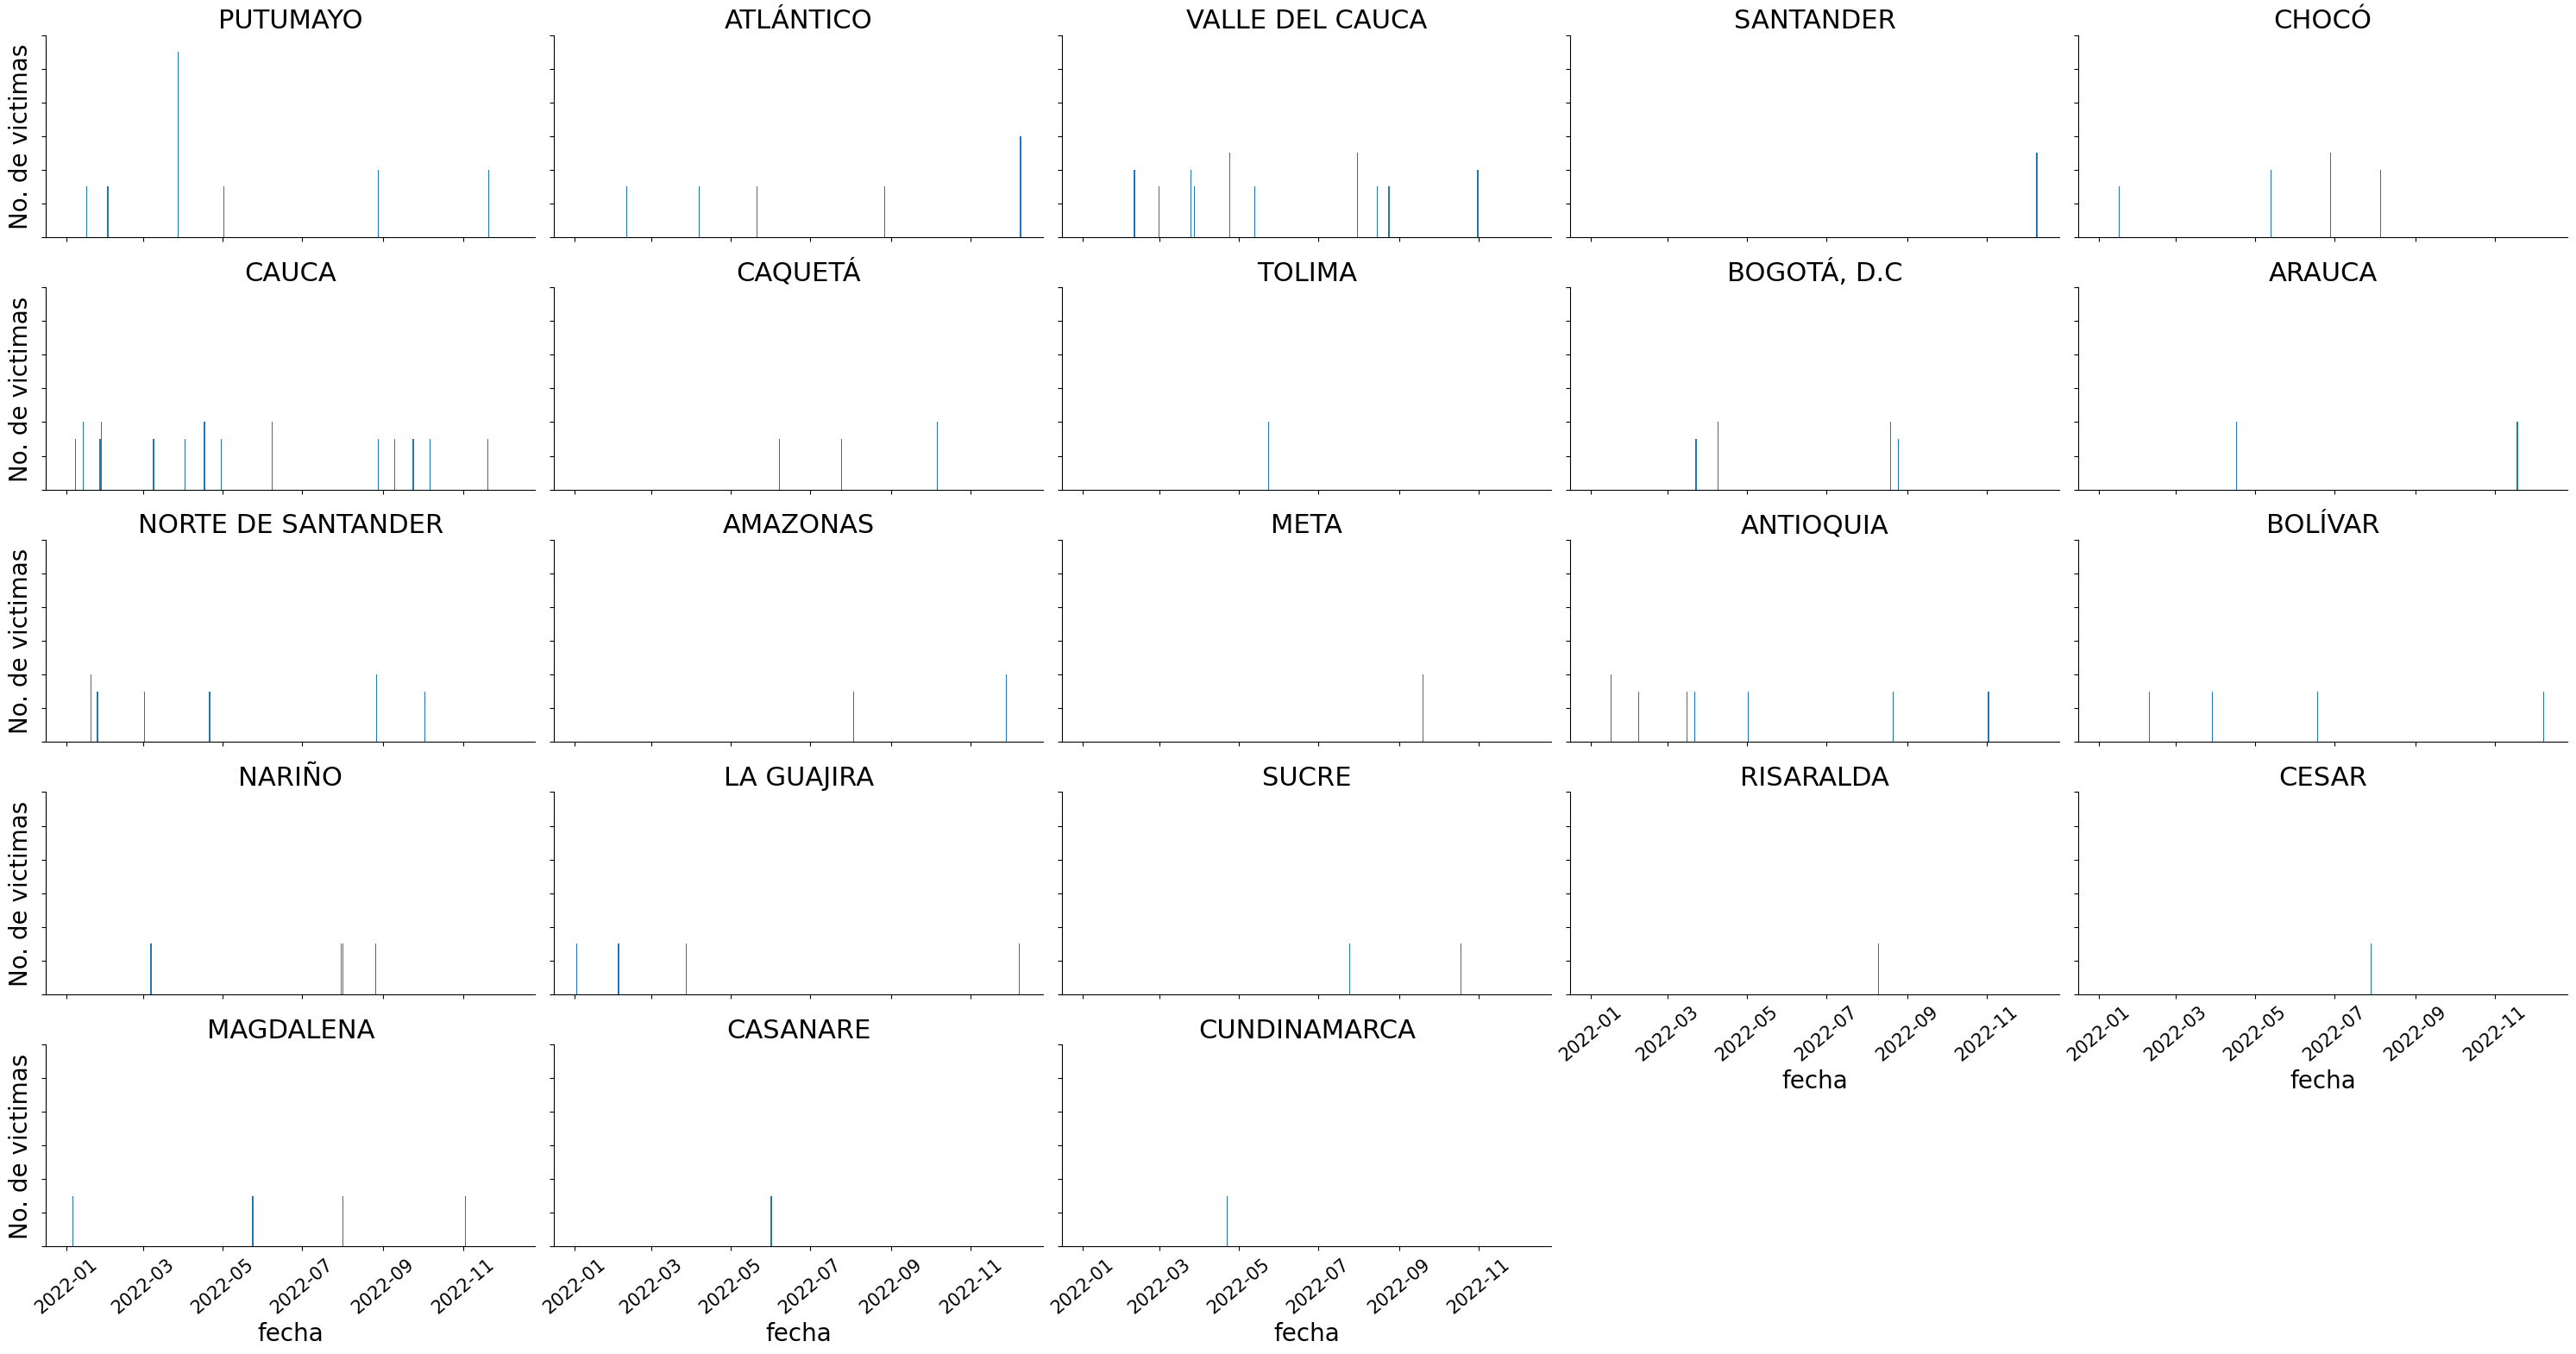

In [10]:
import seaborn as sns

sm = sns.FacetGrid(data_slice, col="Departamento", col_wrap=5, height=3, aspect=2, margin_titles=True)
sm = sm.map(plt.bar, "fecha", "No. de victimas")
# And now format the plots with appropriate titles and font sizes

sm.set_titles("{col_name}", size=22).set_ylabels(size=20).set_yticklabels(size=15)\
                                    .set_xlabels(size=20).set_xticklabels(size=15, rotation=40)

In [ ]:
#Due to that massacres are specific events in differents places, we finish the study with the last graphics and we can state
# the following:

# From the set of graphics showm above we can see that massacres has ocurred in many states in Colombia
# only in 2022. Some states has been deeply affected by this social-security problem like Putumayo, Atlántico,
# Valle del Cauca, Cauca, Norte de Santander, Antioquia and Nariño, therefore these are the areas where the government
# should focus on improving the security and quality of life of its population, fighting the violent groups
# and social necessities as the main strategy to protect the human lifes.

